### 1. Perform EDA and do any data preprocessing required (especially handle imbalance in the dataset).

**Importing the neccesary libraries**

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import feature_column 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler   

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset, DataLoader, Dataset, WeightedRandomSampler
from torch.autograd import Variable
from tqdm import tqdm
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Configuration
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


## Importing the dataset as Pandas Dataframe from Excel Spreadsheet

In [2]:
df = pd.read_excel("CreditCardDataset.xlsx")

## Having a look at the dataset


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


## Checking for datatypes and for each and every variable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

## Check the shape of the data

In [5]:
df.shape

(57355, 31)

## Data description to find more about the data

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


## Now lets look for any missing values

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

***The dataset doesn't contain any missing values for any variable. The "Time" and "Class" variables are integers, while the rest of the variables are of float type. The "Class" variable serves as the target variable, indicating whether a transaction is fraudulent or not. It contains binary values, with one representing the occurrence of fraud for a given data point.***

## Printing unique values of Time variable

In [8]:
df.Time.unique()

array([     2,      7,     11, ..., 172768, 172770, 172777], dtype=int64)

In [9]:
df.groupby('Class').Class.agg('count')

Class
0    56863
1      492
Name: Class, dtype: int64

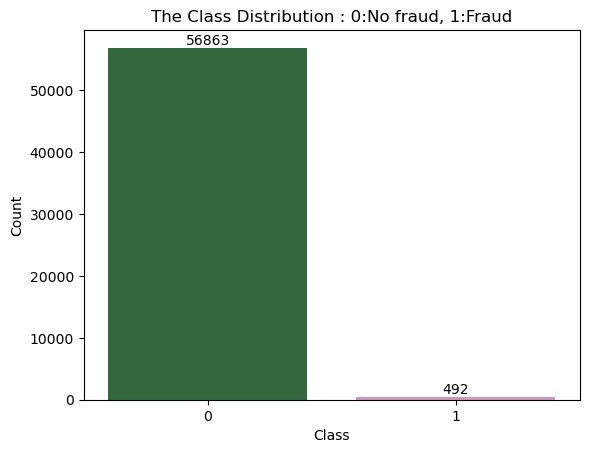

In [10]:
# Create barplot
sns.barplot(x=df['Class'].unique(), y=df['Class'].value_counts(), palette="cubehelix")

# Count labels to each class
for i, count in enumerate(df['Class'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

# labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("The Class Distribution : 0:No fraud, 1:Fraud")
plt.show()


The above distribution of class values shows that the dataset is highly imbalanced towards the class 0. <p>
    Class 0 ----> 56863<br>
    Class 1 ----> 492

***Our dataset shows that most transactions are not fraudulent, with only a small fraction being classified as fraudulent. If we build our predictive models and analysis based solely on this data, our algorithms might make errors and overfit the data. This is because they will assume that fraudulent transactions are rare, when in fact we want our model to accurately detect patterns indicating fraud. Specifically, 99.14% of the transactions in our dataset are non-fraudulent, while only 0.86% are fraudulent.***

### Using a histogram, examine the data distribution.

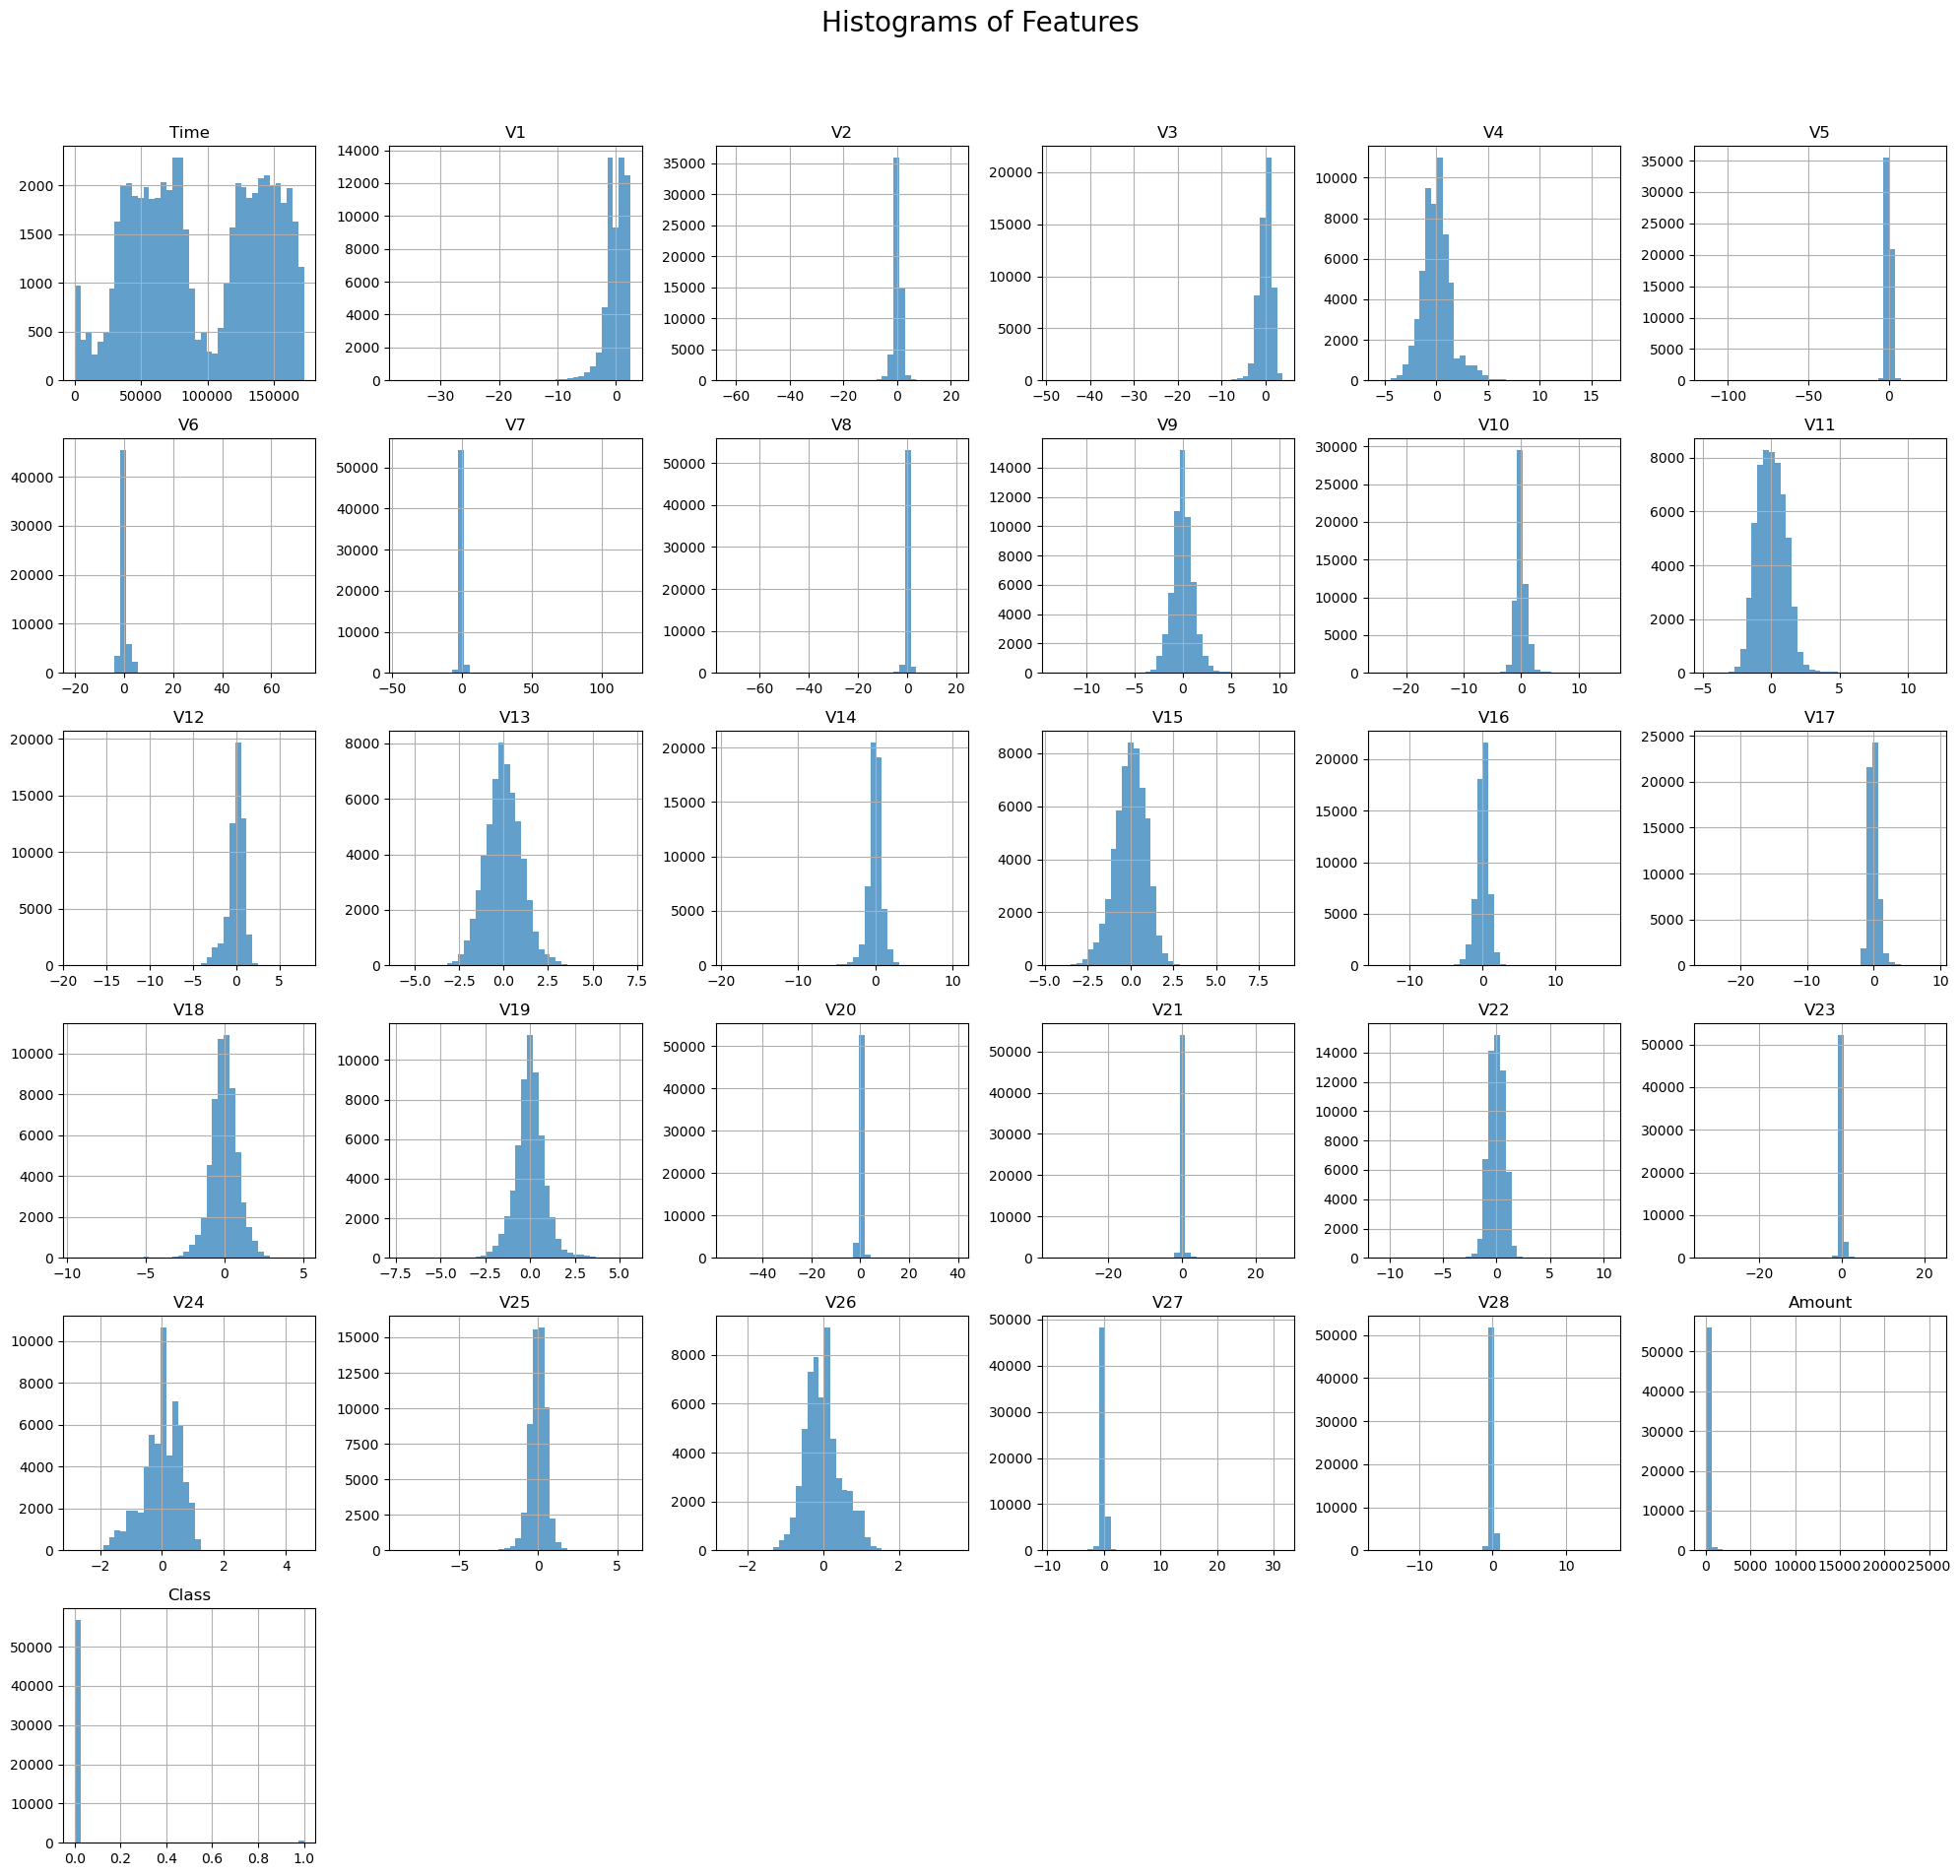

In [11]:
# Plot histogram with a single color
df.hist(bins=40, figsize=(20, 20), color='#1f77b4', alpha=0.7)

# Customize labels and title
plt.suptitle("Histograms of Features", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


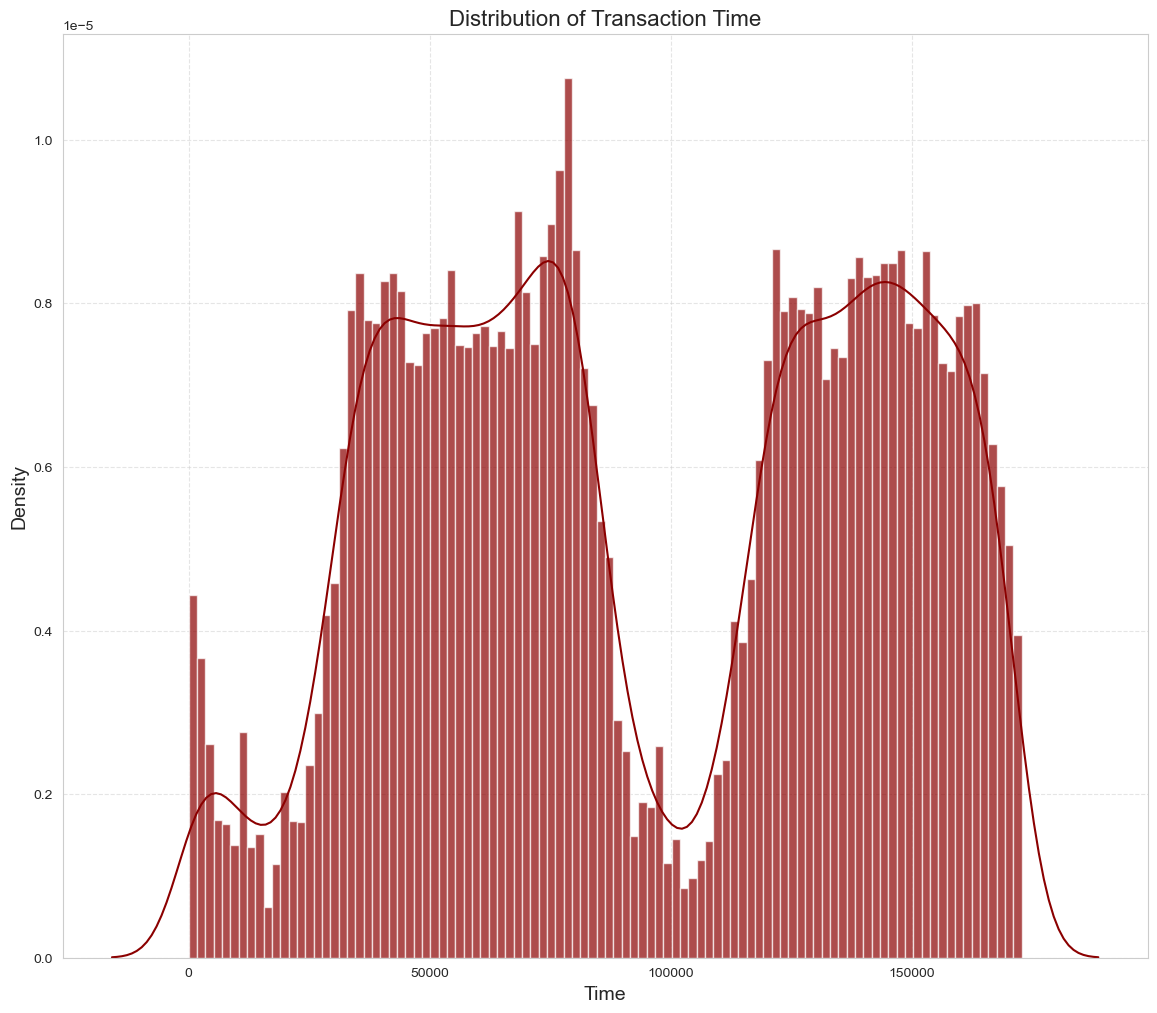

In [12]:
# Set the style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(14, 12))
sns.distplot(df['Time'], bins=100, color="darkred", hist_kws={"alpha": 0.7})

# Title and labels
plt.title('Distribution of Transaction Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


### The graph displays two prominent peaks, along with some smaller peaks. We can interpret these peaks as representing different times of the day. The highest peak likely corresponds to daytime when most transactions occur, while the lower peak indicates nighttime when transaction activity decreases. Since the dataset includes only two days of credit card transactions, we observe two major peaks for those two days and a corresponding decrease during nighttime.

,count,min,median,mean,std,max
Class,,,,,,
0,56863,0.0,22.00,88.536709,279.670869,25691.16
1,492,0.0,9.25,122.211321,256.683288,2125.87


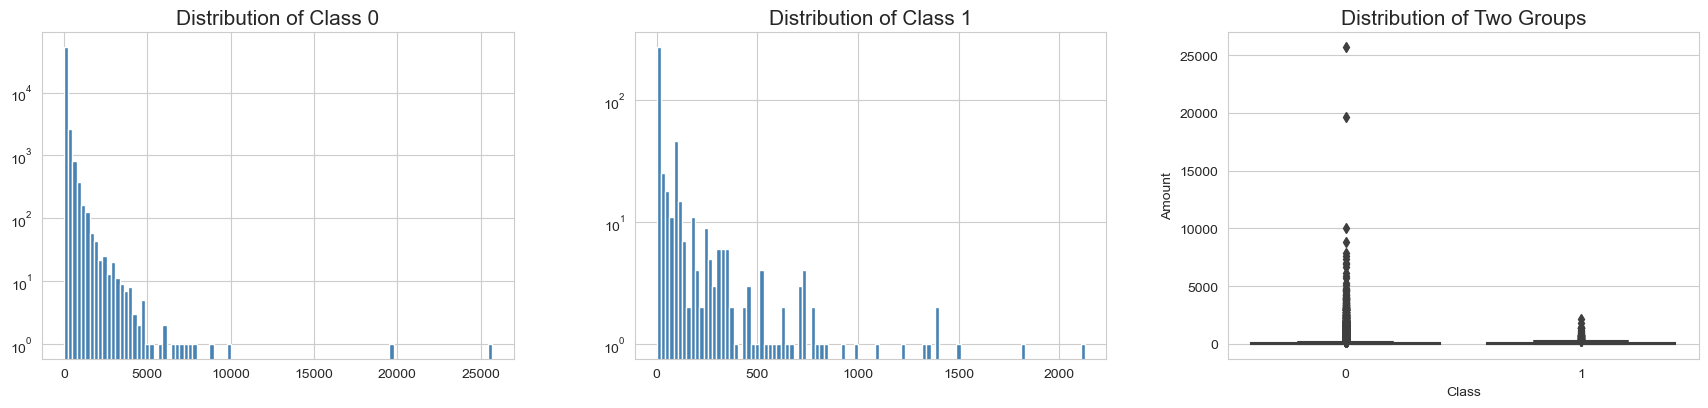

In [13]:
# Comparing the class values with the amount variable to see the relationship using histogram and boxplot

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
df[df.Class == 0].hist("Amount", ax=axes[0], color="steelblue", bins=100)
df[df.Class == 1].hist("Amount", ax=axes[1], color="steelblue", bins=100)

# Set y-axis scale for histograms
axes[0].set_yscale('log')
axes[1].set_yscale('log')

sns.boxplot(x=df.Class, y=df.Amount, ax=axes[2])

axes[0].set_title("Distribution of Class 0", fontsize=15)
axes[1].set_title("Distribution of Class 1", fontsize=15)
axes[2].set_title("Distribution of Two Groups", fontsize=15)

plt.tight_layout(pad=4)

# Descriptive statistics of each class variables with respect to amount
df.groupby('Class').Amount.agg(["count", "min", "median", "mean", "std", "max"])


***The graph illustrates that the majority of fraudulent transactions had a value of less than $500. This underscores the prevalence of fraud for relatively low transaction amounts. This graph demonstrates that the majority of fraudulent transactions had a value of less than 500 dollars.This further demonstrates how prevalent fraud is for an amount so close to nothing.***

## Let's deal with the outliers present in the Amount with respect to the Class variable 


In [14]:
df = df[df.Amount < df.Amount.max()]
df = df[df.Amount < df.Amount.max()]

       count  min  median        mean         std       max
Class                                                      
0      56861  0.0   22.00   87.742305  244.858130  10000.00
1        492  0.0    9.25  122.211321  256.683288   2125.87


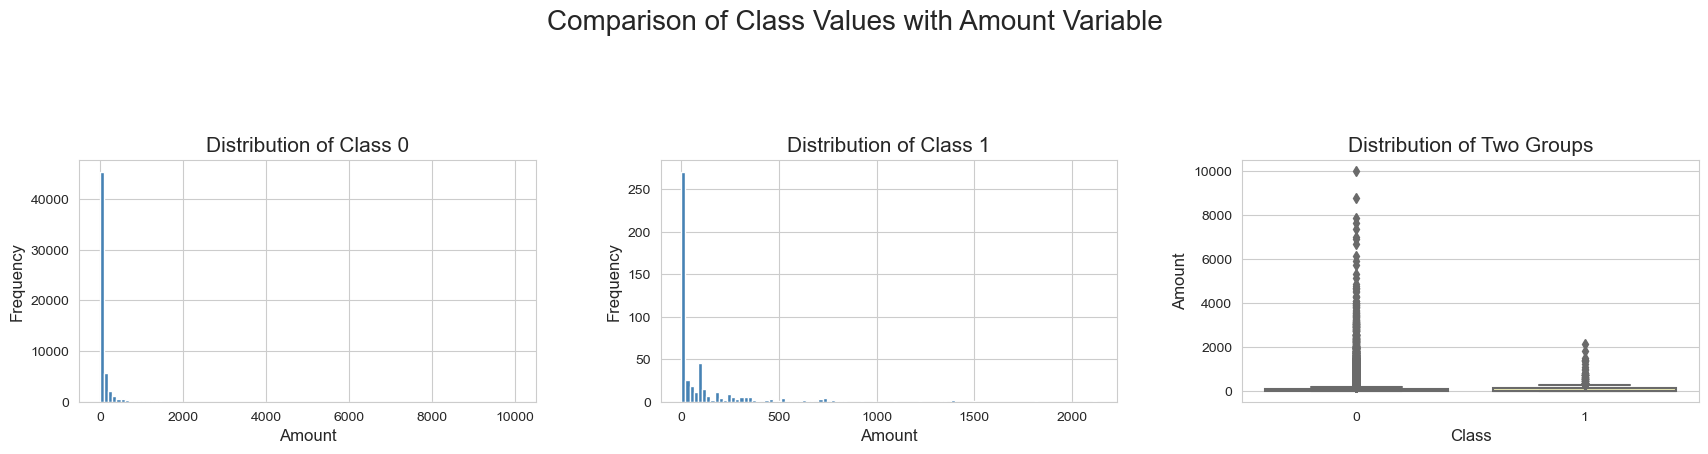

In [15]:
# Comparing the class values with the amount variable to see the relationship using histogram and boxplot

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for Class 0
df[df.Class == 0].hist("Amount", ax=axes[0], color="steelblue", bins=100)
axes[0].set_title("Distribution of Class 0", fontsize=15)
axes[0].set_xlabel("Amount", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Histogram for Class 1
df[df.Class == 1].hist("Amount", ax=axes[1], color="steelblue", bins=100)
axes[1].set_title("Distribution of Class 1", fontsize=15)
axes[1].set_xlabel("Amount", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Boxplot for both classes
sns.boxplot(x=df.Class, y=df.Amount, ax=axes[2], palette="Set3")
axes[2].set_title("Distribution of Two Groups", fontsize=15)
axes[2].set_xlabel("Class", fontsize=12)
axes[2].set_ylabel("Amount", fontsize=12)

plt.suptitle("Comparison of Class Values with Amount Variable", size=20)
plt.tight_layout(pad=4)

# Descriptive statistics of each class variables with respect to amount
stats = df.groupby('Class').Amount.agg(["count", "min", "median", "mean", "std", "max"])
print(stats)


## Scaling the Time and Amount Features
***Since the majority of our data has already been scaled, we need to scale the remaining columns, which are Amount and Time.***

***We chose to use the RobustScaler to scale both Time and Amount because it is less sensitive to outliers.***

In [16]:
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [17]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head() # Here the time and also the amount are scaled for further usage.

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.671987,-0.993474,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
1,-0.256475,-0.993474,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
2,0.263335,-0.993415,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
3,0.077138,-0.993368,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,...,-0.153197,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0
4,-0.083998,-0.993356,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,...,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,0


### Splitting the data for further classification

In [18]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=123)

No Frauds 99.14 % of the dataset
Frauds 0.86 % of the dataset


### See if both the train and test label distribution are similarly distributed

In [19]:
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99147814 0.00852186]
[0.99137848 0.00862152]


***Before we proceed with the oversampling technique, it's essential to separate the original dataframe for testing purposes. This ensures that we test our models on the original testing set rather than the testing set created by the oversampling technique.***

### Synthetic Minority Over-sampling Technique (SMOTE)
***We utilize the Synthetic Minority Over-sampling Technique (SMOTE) to address the imbalance in our data through oversampling.***

In [20]:
sm = SMOTE()
X_sampled,y_sampled = sm.fit_resample(X_train,y_train)

## Percentage of the fraudlent records in the original data.

In [21]:
data_no_fraud_count = len(df[df.Class==0])
data_fraud_count = len(df[df.Class==1])
print('The Percentage(%) of fraud counts in the original dataset:{}%'.format((data_fraud_count*100)/(data_no_fraud_count+data_fraud_count)))

The Percentage(%) of fraud counts in the original dataset:0.8578452740048472%


## Percentage of Fraudulent Records in the Sampled Data


In [22]:
Sampled_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_fraud_count = len(y_sampled[y_sampled==1])
print('Percentage(%) of fraud counts in the new data:{}%'.format((Sampled_fraud_count*100)/(Sampled_no_fraud_count+Sampled_fraud_count)))

Percentage(%) of fraud counts in the new data:50.0%


***SMOTE generates synthetic points from the minority class to balance the dataset by selecting distances between closest neighbors. It retains more information compared to random undersampling and achieves a 50/50 ratio of fraud and non-fraud transactions for a balanced dataset.***

In [23]:
print("Dataset before SMOTE")
print("Number transactions in the train dataset: ", len(X_train))
print("Number transactions in the test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Dataset before SMOTE
Number transactions in the train dataset:  45882
Number transactions in the test dataset:  10323
Total number of transactions:  56205


In [24]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sampled,y_sampled,test_size = 0.3,random_state = 123)
print("Dataset after SMOTE")
print("Number transactions in the train dataset: ", len(X_train_sm))
print("Number transactions in the test dataset: ", len(X_test_sm))
print("Total number of transactions: ", len(X_train_sm)+len(X_test_sm))

Dataset after SMOTE
Number transactions in the train dataset:  63687
Number transactions in the test dataset:  27295
Total number of transactions:  90982


## Converting them into an array for further model traininig purpose

In [25]:
X_train_sm_ar = np.array(X_train_sm)
X_test_sm_ar = np.array(X_test_sm)
X_val_ar = np.array(X_val)
y_val_ar = np.array(y_val)
y_train_sm_ar = np.array(y_train_sm)
y_test_sm_ar = np.array(y_test_sm)

## 2. Implement a Neural Network using PyTorch Framework
**a. Plot training loss and validation loss**

**b. Plot training accuracy and validation accuracy**

## Data loader for model

In [26]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(X_train_sm_ar), torch.from_numpy(y_train_sm_ar)), 
                          batch_size=len(X_train_sm), shuffle=True)
test_loader = DataLoader(TensorDataset(torch.from_numpy(X_test_sm_ar), torch.from_numpy(y_test_sm_ar)), 
                         batch_size=len(X_test_sm), shuffle=False)
val_loader = DataLoader(TensorDataset(torch.from_numpy(X_val_ar), torch.from_numpy(y_val_ar)), 
                         batch_size=len(X_val), shuffle=False)
data_loaders = {"train": train_loader,
               "test": test_loader,
               "validation": val_loader}

In [27]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30, 340) 
        # hidden layers with 340 and 220 neurons each
        self.fc2 = nn.Linear(340,220) 
        self.fc3 = nn.Linear(220, 200)
        self.fc4 = nn.Linear(200,70)
        self.fc5 = nn.Linear(70,10)
        self.fc6 = nn.Linear(10,2) 
        # two responses - 0 or 1
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self,out):
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = F.relu(self.fc4(out))
        out = self.dropout(F.relu(self.fc5(out)))
        out = F.log_softmax(self.fc6(out),dim=1)
        
        return out

### Model declaration, type of loss and optimizer (adam optimizer to optimize our network).

In [28]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [29]:
model

Classifier(
  (fc1): Linear(in_features=30, out_features=340, bias=True)
  (fc2): Linear(in_features=340, out_features=220, bias=True)
  (fc3): Linear(in_features=220, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=70, bias=True)
  (fc5): Linear(in_features=70, out_features=10, bias=True)
  (fc6): Linear(in_features=10, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

### Calculating the accuracy of the model

In [30]:
def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis=1)

In [31]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

## Training model

In [32]:
loss1 = []
val_loss1=[]
train_acc = []
val_acc=[]
Epoch = 50
print("Training Begins here")
for epoch in tqdm(range(Epoch)):
    
    acc = 0 # The training is donw
    train_acc1=0
    train_epoch_loss=0
    
    for i, (features, labels) in enumerate(train_loader):
        
        features = Variable(features)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        features = features.float()
        outputs = model(features)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
        
        train_epoch_loss += loss.item()
        
        if (i+1) % len(train_loader) == 0:
            y_pred = predict(model, torch.from_numpy(X_train_sm_ar).float())
            acc = np.mean(y_train_sm == y_pred)
            
            train_acc1 = acc/len(train_loader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)
            
    val_acc = 0 # Validation process
    val_acc1=0
    val_epoch_loss=0
    with torch.no_grad():
            for i, (val_features, val_labels) in enumerate(val_loader):
                val_features = Variable(val_features)
                val_labels = Variable(val_labels)
        
                val_features = val_features.float()
                val_outputs = model(val_features)
                val_loss = criterion(val_outputs, val_labels.long())        
                optimizer.step()
        
                val_epoch_loss += val_loss.item()
        
                if (i+1) % len(val_loader) == 0:
                    y_pred_val = predict(model, torch.from_numpy(X_val_ar).float())
                    val_acc = np.mean(y_val == y_pred_val)
            
                    val_acc1 = val_acc/len(val_loader)
                    val_acc += val_acc1.item()
                    val_loss1.append(val_loss.data)
                    
            loss_stats['train'].append(train_epoch_loss/len(train_loader))
            loss_stats['val'].append(val_epoch_loss/len(val_loader))
            accuracy_stats['train'].append(train_acc1/len(train_loader))
            accuracy_stats['val'].append(val_acc1/len(val_loader))
            
            print(f'Epoch {epoch+1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_acc1:.3f} | Val acc: {val_acc1:.3f} ')

Training Begins here


  2%|▏         | 1/50 [00:02<01:49,  2.23s/it]

Epoch 1: | Train Loss: 0.71991 | Val loss: 1.03747 | Train Acc: 0.501 | Val acc: 0.010 


  4%|▍         | 2/50 [00:03<01:33,  1.95s/it]

Epoch 2: | Train Loss: 0.93955 | Val loss: 0.63284 | Train Acc: 0.500 | Val acc: 0.790 


  6%|▌         | 3/50 [00:06<01:39,  2.11s/it]

Epoch 3: | Train Loss: 3.10882 | Val loss: 0.60354 | Train Acc: 0.498 | Val acc: 0.787 


  8%|▊         | 4/50 [00:08<01:31,  2.00s/it]

Epoch 4: | Train Loss: 0.58834 | Val loss: 0.49082 | Train Acc: 0.825 | Val acc: 0.820 


 10%|█         | 5/50 [00:10<01:30,  2.00s/it]

Epoch 5: | Train Loss: 0.48018 | Val loss: 0.24317 | Train Acc: 0.904 | Val acc: 0.969 


 12%|█▏        | 6/50 [00:12<01:26,  1.98s/it]

Epoch 6: | Train Loss: 0.40011 | Val loss: 0.10070 | Train Acc: 0.933 | Val acc: 0.963 


 14%|█▍        | 7/50 [00:14<01:27,  2.03s/it]

Epoch 7: | Train Loss: 0.33961 | Val loss: 0.09002 | Train Acc: 0.946 | Val acc: 0.920 


 16%|█▌        | 8/50 [00:16<01:23,  1.99s/it]

Epoch 8: | Train Loss: 0.28204 | Val loss: 0.15095 | Train Acc: 0.931 | Val acc: 0.866 


 18%|█▊        | 9/50 [00:17<01:18,  1.92s/it]

Epoch 9: | Train Loss: 0.22898 | Val loss: 0.20828 | Train Acc: 0.920 | Val acc: 0.865 


 20%|██        | 10/50 [00:19<01:17,  1.93s/it]

Epoch 10: | Train Loss: 0.18521 | Val loss: 0.21352 | Train Acc: 0.935 | Val acc: 0.920 


 22%|██▏       | 11/50 [00:21<01:16,  1.96s/it]

Epoch 11: | Train Loss: 0.14324 | Val loss: 0.15634 | Train Acc: 0.954 | Val acc: 0.954 


 24%|██▍       | 12/50 [00:23<01:15,  1.98s/it]

Epoch 12: | Train Loss: 0.14759 | Val loss: 0.11645 | Train Acc: 0.956 | Val acc: 0.963 


 26%|██▌       | 13/50 [00:25<01:11,  1.92s/it]

Epoch 13: | Train Loss: 0.12248 | Val loss: 0.09864 | Train Acc: 0.964 | Val acc: 0.965 


 28%|██▊       | 14/50 [00:27<01:07,  1.88s/it]

Epoch 14: | Train Loss: 0.09416 | Val loss: 0.10858 | Train Acc: 0.970 | Val acc: 0.953 


 30%|███       | 15/50 [00:29<01:08,  1.95s/it]

Epoch 15: | Train Loss: 0.09626 | Val loss: 0.10017 | Train Acc: 0.968 | Val acc: 0.956 


 32%|███▏      | 16/50 [00:31<01:04,  1.90s/it]

Epoch 16: | Train Loss: 0.09752 | Val loss: 0.07230 | Train Acc: 0.967 | Val acc: 0.974 


 34%|███▍      | 17/50 [00:33<01:01,  1.87s/it]

Epoch 17: | Train Loss: 0.08641 | Val loss: 0.05844 | Train Acc: 0.974 | Val acc: 0.969 


 36%|███▌      | 18/50 [00:35<01:02,  1.94s/it]

Epoch 18: | Train Loss: 0.07091 | Val loss: 0.06728 | Train Acc: 0.976 | Val acc: 0.963 


 38%|███▊      | 19/50 [00:37<00:59,  1.93s/it]

Epoch 19: | Train Loss: 0.06945 | Val loss: 0.07541 | Train Acc: 0.975 | Val acc: 0.962 


 40%|████      | 20/50 [00:39<00:57,  1.93s/it]

Epoch 20: | Train Loss: 0.06965 | Val loss: 0.08588 | Train Acc: 0.977 | Val acc: 0.966 


 42%|████▏     | 21/50 [00:40<00:55,  1.90s/it]

Epoch 21: | Train Loss: 0.06220 | Val loss: 0.06224 | Train Acc: 0.981 | Val acc: 0.976 


 44%|████▍     | 22/50 [00:42<00:54,  1.95s/it]

Epoch 22: | Train Loss: 0.05687 | Val loss: 0.03272 | Train Acc: 0.982 | Val acc: 0.979 


 46%|████▌     | 23/50 [00:44<00:52,  1.94s/it]

Epoch 23: | Train Loss: 0.05658 | Val loss: 0.02913 | Train Acc: 0.983 | Val acc: 0.976 


 48%|████▊     | 24/50 [00:46<00:50,  1.94s/it]

Epoch 24: | Train Loss: 0.05119 | Val loss: 0.03725 | Train Acc: 0.985 | Val acc: 0.976 


 50%|█████     | 25/50 [00:48<00:48,  1.95s/it]

Epoch 25: | Train Loss: 0.04921 | Val loss: 0.03705 | Train Acc: 0.985 | Val acc: 0.974 


 52%|█████▏    | 26/50 [00:50<00:46,  1.94s/it]

Epoch 26: | Train Loss: 0.04692 | Val loss: 0.03648 | Train Acc: 0.985 | Val acc: 0.976 


 54%|█████▍    | 27/50 [00:52<00:45,  1.98s/it]

Epoch 27: | Train Loss: 0.04513 | Val loss: 0.03091 | Train Acc: 0.987 | Val acc: 0.983 


 56%|█████▌    | 28/50 [00:54<00:42,  1.95s/it]

Epoch 28: | Train Loss: 0.03956 | Val loss: 0.02281 | Train Acc: 0.990 | Val acc: 0.988 


 58%|█████▊    | 29/50 [00:56<00:41,  1.97s/it]

Epoch 29: | Train Loss: 0.03649 | Val loss: 0.02040 | Train Acc: 0.990 | Val acc: 0.986 


 60%|██████    | 30/50 [00:58<00:38,  1.94s/it]

Epoch 30: | Train Loss: 0.03686 | Val loss: 0.02667 | Train Acc: 0.990 | Val acc: 0.983 


 62%|██████▏   | 31/50 [01:00<00:38,  2.02s/it]

Epoch 31: | Train Loss: 0.03548 | Val loss: 0.03139 | Train Acc: 0.991 | Val acc: 0.983 


 64%|██████▍   | 32/50 [01:02<00:36,  2.05s/it]

Epoch 32: | Train Loss: 0.03486 | Val loss: 0.02747 | Train Acc: 0.992 | Val acc: 0.987 


 66%|██████▌   | 33/50 [01:04<00:34,  2.02s/it]

Epoch 33: | Train Loss: 0.03244 | Val loss: 0.02825 | Train Acc: 0.992 | Val acc: 0.986 


 68%|██████▊   | 34/50 [01:07<00:33,  2.10s/it]

Epoch 34: | Train Loss: 0.03237 | Val loss: 0.01870 | Train Acc: 0.991 | Val acc: 0.987 


 70%|███████   | 35/50 [01:09<00:30,  2.05s/it]

Epoch 35: | Train Loss: 0.03487 | Val loss: 0.02284 | Train Acc: 0.992 | Val acc: 0.983 


 72%|███████▏  | 36/50 [01:11<00:28,  2.04s/it]

Epoch 36: | Train Loss: 0.03152 | Val loss: 0.02661 | Train Acc: 0.992 | Val acc: 0.980 


 74%|███████▍  | 37/50 [01:13<00:26,  2.07s/it]

Epoch 37: | Train Loss: 0.03227 | Val loss: 0.02878 | Train Acc: 0.991 | Val acc: 0.976 


 76%|███████▌  | 38/50 [01:15<00:24,  2.03s/it]

Epoch 38: | Train Loss: 0.03346 | Val loss: 0.04636 | Train Acc: 0.989 | Val acc: 0.978 


 78%|███████▊  | 39/50 [01:17<00:21,  1.99s/it]

Epoch 39: | Train Loss: 0.03559 | Val loss: 0.03927 | Train Acc: 0.991 | Val acc: 0.980 


 80%|████████  | 40/50 [01:19<00:19,  1.99s/it]

Epoch 40: | Train Loss: 0.02894 | Val loss: 0.03542 | Train Acc: 0.992 | Val acc: 0.990 


 82%|████████▏ | 41/50 [01:21<00:18,  2.07s/it]

Epoch 41: | Train Loss: 0.03211 | Val loss: 0.02161 | Train Acc: 0.992 | Val acc: 0.989 


 84%|████████▍ | 42/50 [01:23<00:16,  2.01s/it]

Epoch 42: | Train Loss: 0.03001 | Val loss: 0.03332 | Train Acc: 0.992 | Val acc: 0.984 


 86%|████████▌ | 43/50 [01:25<00:14,  2.06s/it]

Epoch 43: | Train Loss: 0.03167 | Val loss: 0.03844 | Train Acc: 0.991 | Val acc: 0.985 


 88%|████████▊ | 44/50 [01:27<00:12,  2.03s/it]

Epoch 44: | Train Loss: 0.02946 | Val loss: 0.02700 | Train Acc: 0.992 | Val acc: 0.988 


 90%|█████████ | 45/50 [01:29<00:10,  2.02s/it]

Epoch 45: | Train Loss: 0.02985 | Val loss: 0.02363 | Train Acc: 0.992 | Val acc: 0.989 


 92%|█████████▏| 46/50 [01:31<00:07,  1.99s/it]

Epoch 46: | Train Loss: 0.02847 | Val loss: 0.02763 | Train Acc: 0.993 | Val acc: 0.983 


 94%|█████████▍| 47/50 [01:33<00:05,  1.99s/it]

Epoch 47: | Train Loss: 0.02783 | Val loss: 0.03958 | Train Acc: 0.991 | Val acc: 0.978 


 96%|█████████▌| 48/50 [01:35<00:04,  2.07s/it]

Epoch 48: | Train Loss: 0.02943 | Val loss: 0.02712 | Train Acc: 0.993 | Val acc: 0.983 


 98%|█████████▊| 49/50 [01:37<00:02,  2.04s/it]

Epoch 49: | Train Loss: 0.02739 | Val loss: 0.02451 | Train Acc: 0.992 | Val acc: 0.984 


100%|██████████| 50/50 [01:39<00:00,  1.99s/it]

Epoch 50: | Train Loss: 0.02983 | Val loss: 0.02132 | Train Acc: 0.994 | Val acc: 0.982 


## Now lets predict for test dataset

In [33]:
# Implementation of the model
y_pred = predict(model, torch.from_numpy(X_test_sm_ar).float()) 
acc = np.mean(y_test_sm == y_pred) 
# Actual test with pred
print("Test accuracy is as follows: ", acc)

Test accuracy is as follows:  0.9921230994687672


## Plotting the graph for loss and accuracy in training and validation

In [34]:
# Creating the dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

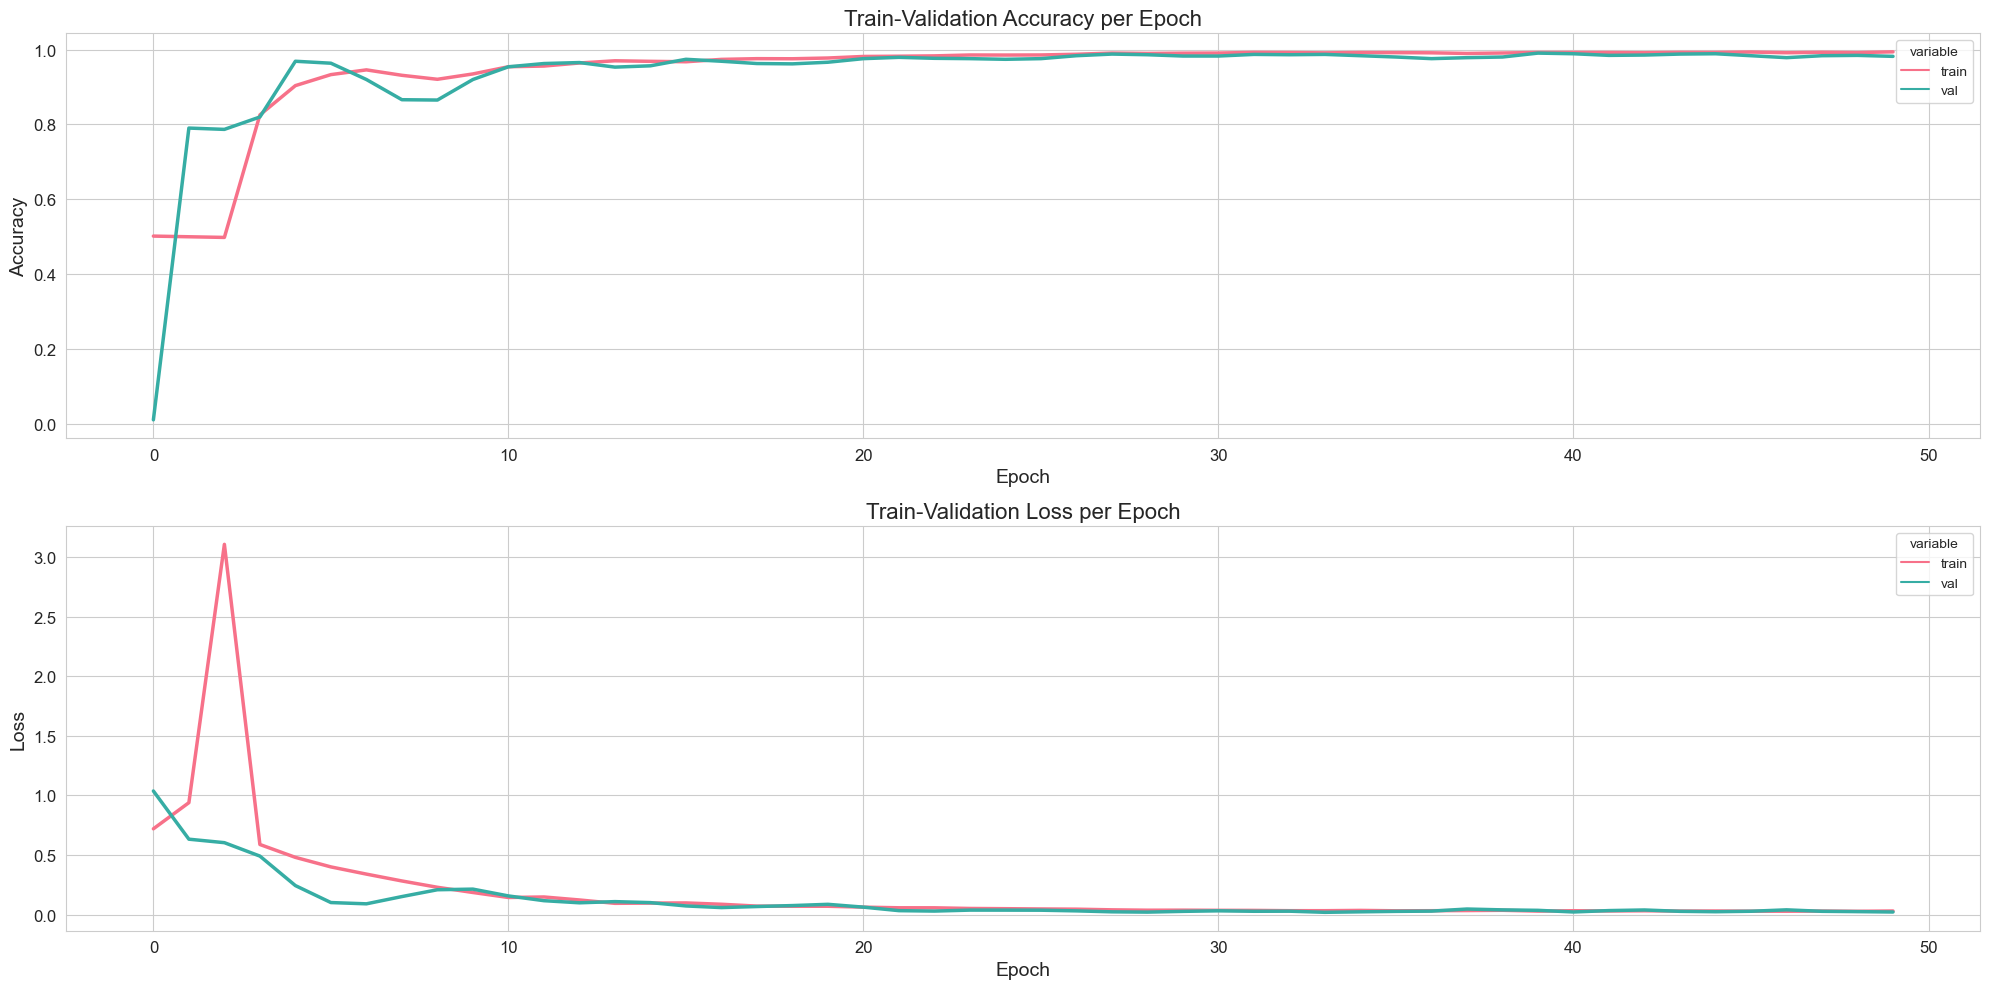

In [44]:
# Plotting the dataframes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

# Plotting Train-Validation Accuracy/Epoch
sns.lineplot(data=train_val_acc_df, x="epochs", y="value", hue="variable", ax=axes[0], palette="husl", linewidth=2.5)
axes[0].set_title('Train-Validation Accuracy per Epoch', fontsize=16)
axes[0].set_xlabel('Epoch', fontsize=14)
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].grid(True)

# Plotting Train-Validation Loss/Epoch
sns.lineplot(data=train_val_loss_df, x="epochs", y="value", hue="variable", ax=axes[1], palette="husl", linewidth=2.5)
axes[1].set_title('Train-Validation Loss per Epoch', fontsize=16)
axes[1].set_xlabel('Epoch', fontsize=14)
axes[1].set_ylabel('Loss', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Confusion matrix

In [36]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test_sm, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99     13738
     Class 1       0.98      1.00      0.99     13557

    accuracy                           0.99     27295
   macro avg       0.99      0.99      0.99     27295
weighted avg       0.99      0.99      0.99     27295



### **From our initial data exploration, we identified a significant class imbalance, with only 0.86% of transactions being fraudulent. To address this imbalance, we employed the Synthetic Minority Over-sampling Technique (SMOTE), which effectively balanced the dataset by generating synthetic instances of the minority class.**

### **Throughout the training process of our neural network model using PyTorch, we observed a consistent improvement in both training and validation metrics. The loss graphs demonstrated a gradual decrease over epochs, indicating the model's ability to effectively learn from the data. Similarly, the accuracy graphs showed steady increases, highlighting the model's enhanced capability to classify transactions accurately.**

### **Upon evaluation, our model achieved an impressive accuracy of approximately 99.2% on the test data, with high precision, recall, and F1-score values for both fraudulent and non-fraudulent transactions. These results signify the model's exceptional performance in detecting credit card fraud, with minimal misclassifications.**

## ***In conclusion, the combination of SMOTE for handling class imbalance and robust training procedures contributed to the successful development of a highly accurate fraud detection model. The presented loss and accuracy graphs provide compelling evidence of the model's effectiveness and reliability in real-world scenarios.***